In [5]:
import numpy as np
import time
from scipy import misc, ndimage
from PIL import Image
import matplotlib.pyplot as plt
import random
import os
from data_loader import *
from data_visualizer import *

np.random.seed(2018)

import keras
from keras.utils import plot_model
from keras.models import Sequential
from keras.layers import Activation, Dense
from keras.models import load_model
from keras.optimizers import SGD, Adam
from keras.callbacks import CSVLogger, ReduceLROnPlateau
from keras_sequential_ascii import keras2ascii
from sklearn.metrics import accuracy_score, f1_score

Using TensorFlow backend.


In [6]:
#inicializace dat
x_train, y_train = load_data()
x_test, y_test = load_test_data()
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(6625, 64, 64, 3)
(6625,)
(700, 64, 64, 3)
(700,)


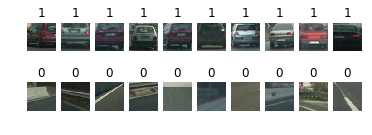

In [7]:
#zobrazení příkladů trénovacího souboru
visualize_examples(x_train, y_train, 10)

In [8]:
#změna matice
x_train, x_test = change_matrix(x_train, x_test)

Dimenze trénovacího setu X:(6625, 12288)
Dimenze testovacího setu X:(700, 12288)


In [9]:
# vytvoření modelu neuronové sítě
def train_model( x_train, y_train, epochs, batch_size, optimizer):
    
    #inicializace parametrů
    epochs_n = epochs
    batch_size_n = batch_size

    #vytvoření modelu logistické regrese
    model = Sequential()
    model.add(Dense(units = 1, activation = "sigmoid", input_dim = x_train.shape[1]))

    #nastavení optimizeru
    if (optimizer == 'sgd'):
        sgd = SGD(lr = 0.01, momentum = 0.0, decay = 0.0, nesterov = True)
        model.compile(optimizer = sgd, loss = "binary_crossentropy", metrics = ["accuracy"])
        
    elif (optimizer == 'adam'):
        adam = Adam(lr = 0.001, beta_1 = 0.9, beta_2 = 0.999, epsilon = 1e-08, decay = 0.0)
        model.compile(optimizer = adam, loss = "binary_crossentropy", metrics = ["accuracy"])

    
    start = time.time()
    # vytvoření logu trénování
    csv_logger = CSVLogger('log_reg_sgd_10e.log')
    reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2,
                              patience=5, min_lr = 0.001)
    # trénování modelu model.fit()
    history = model.fit(x_train, y_train, validation_split = 0.2,  epochs = epochs_n, batch_size = batch_size_n,
                        verbose = 1, callbacks = [csv_logger, reduce_lr])
    end = time.time() 
    
    # vytiskne přehled modelu
    print("Model took %0.2f seconds to train"%(end - start))
    print(model.summary())
    keras2ascii(model)
    print_graphs(history)
    
    # uložení modelu jako .h5
    model.save(r'C:\Users\Petr\Desktop\Bakalářská práce\Neural_networks\deep_nn\log_reg_sgd_10e.h5')
    
    return history, model

Train on 5300 samples, validate on 1325 samples
Epoch 1/10
5300/5300 [==============================] - 1s 98us/step - loss: 0.4717 - acc: 0.7975 - val_loss: 0.3084 - val_acc: 0.8898
Epoch 2/10
5300/5300 [==============================] - 0s 72us/step - loss: 0.3089 - acc: 0.8838 - val_loss: 0.2875 - val_acc: 0.8913
Epoch 3/10
5300/5300 [==============================] - 0s 86us/step - loss: 0.2772 - acc: 0.8998 - val_loss: 0.3112 - val_acc: 0.8747
Epoch 4/10
5300/5300 [==============================] - 0s 74us/step - loss: 0.2655 - acc: 0.9089 - val_loss: 0.2771 - val_acc: 0.9004
Epoch 5/10
5300/5300 [==============================] - 0s 72us/step - loss: 0.2472 - acc: 0.9151 - val_loss: 0.2394 - val_acc: 0.9170
Epoch 6/10
5300/5300 [==============================] - 0s 72us/step - loss: 0.2424 - acc: 0.9168 - val_loss: 0.2289 - val_acc: 0.9245
Epoch 7/10
5300/5300 [==============================] - 0s 72us/step - loss: 0.2326 - acc: 0.9223 - val_loss: 0.2716 - val_acc: 0.8981
Epoch 8

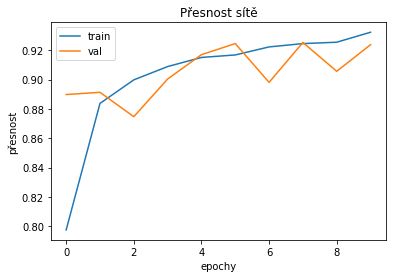

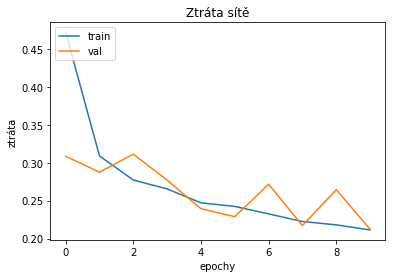

In [10]:
# trénování modelu
history, model = train_model(x_train, y_train, 10, 32, 'sgd')

In [110]:
# vytvoření modelu jako obrázku
os.environ["PATH"] += os.pathsep + 'C:/Program Files (x86)/Graphviz2.38/bin/'
plot_model(model, to_file='log_reg_sgd_10e.png', show_shapes=True, show_layer_names=True)

In [23]:
# odstranit stávající model
del model

In [97]:
# načtení uloženého modelu
model = load_model('log_reg_adam_200e.h5')

In [7]:
# metoda pro udělání predikce na testovacím souboru
def prediction_test(model, x_test, y_test):
    
    test_predictions = model.predict(x_test)
    test_predictions = np.round(test_predictions)

    # vrácení přesnosti predikce
    accuracy = accuracy_score(y_test, test_predictions)
    print("Přesnost testovacího datasetu: " + str(accuracy * 100) + "%")
    
    return test_predictions

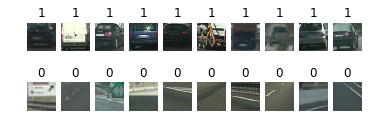

In [8]:
# zobrazení testovacích dat
visualize_examples(x_test, y_test, 10)

In [9]:
# predikce testovacího souboru
test_predictions = prediction_test(model, x_test, y_test)

Přesnost testovacího setu: 92.71428571428572%


počet špatných odhadů: 51


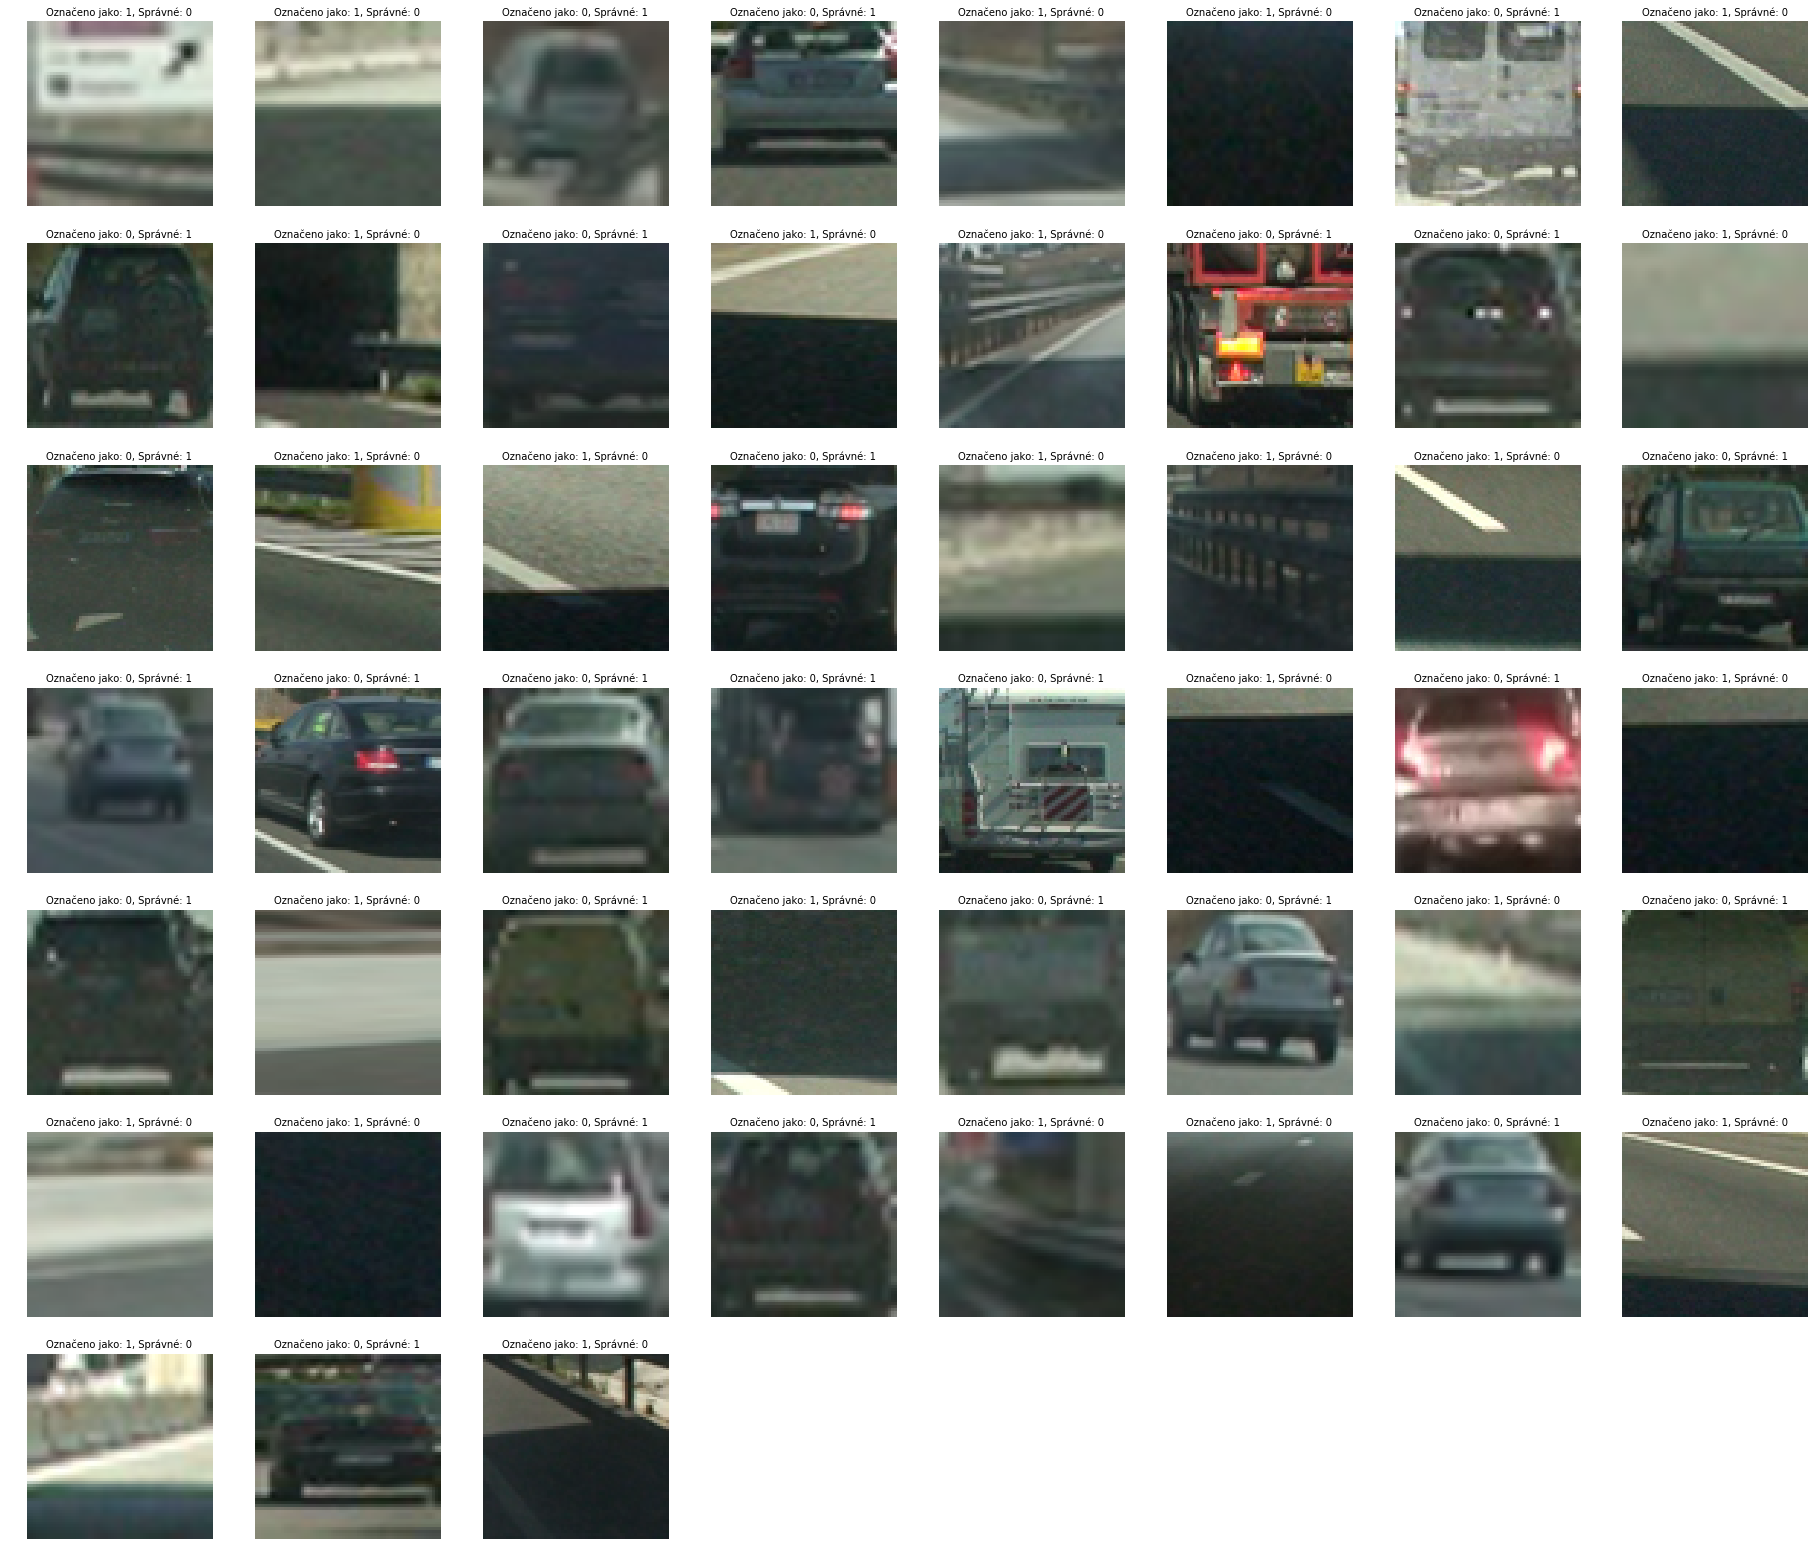

In [10]:
# zobrazení nesprávně označených obrázků
visualize_incorrect_labels(x_test, y_test, np.asarray(test_predictions).ravel())